In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=42)

In [4]:
# Ignore y in clustering
X.shape

(1000, 2)

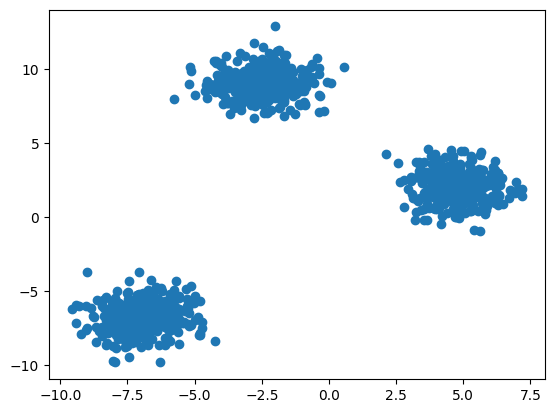

In [8]:
plt.scatter(X[:,0], X[:,1])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Manual Process
## Elbow methof
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[44450.723875420386,
 12741.823357662124,
 1329.7219815435355,
 1183.645743800022,
 1034.2305731923186,
 942.1672889718188,
 787.9384286330778,
 717.8362360115411,
 595.4249066970299,
 565.9616457996455]

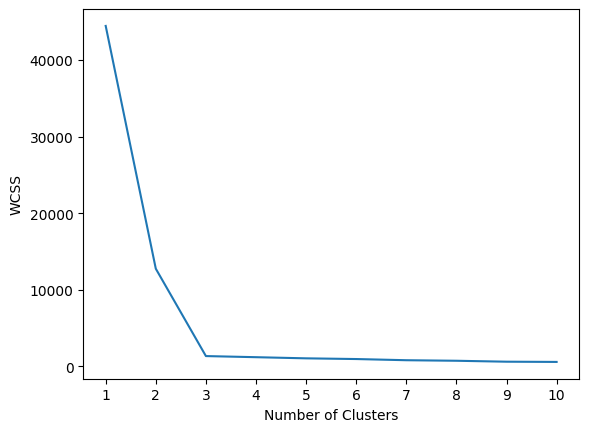

In [13]:
# Elbow curve plotting
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.ylabel("WCSS")
plt.xlabel("Number of Clusters")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [19]:
y_labels=kmeans.fit_predict(X_train)

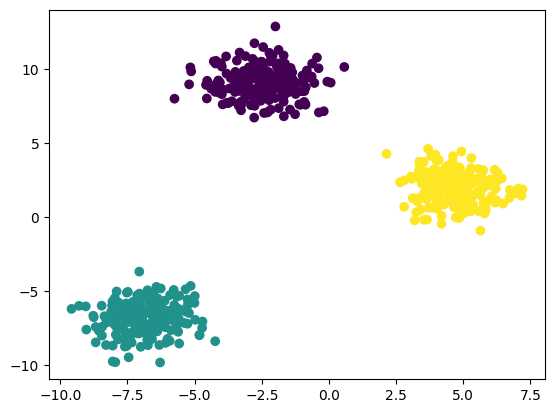

In [20]:
plt.scatter(X_train[:,0], X_train[:,1],c=y_labels)

In [24]:
y_test_lables=kmeans.predict(X_test)

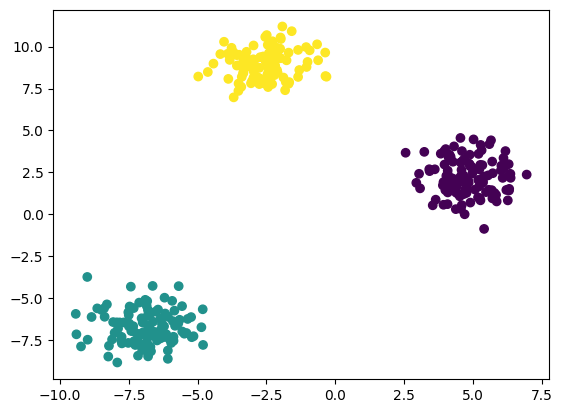

In [25]:
plt.scatter(X_test[:,0], X_test[:,1],c=y_test_lables)

In [29]:
# Performance metrics
from sklearn.metrics import silhouette_score
silhouette_coff=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coff.append(score)

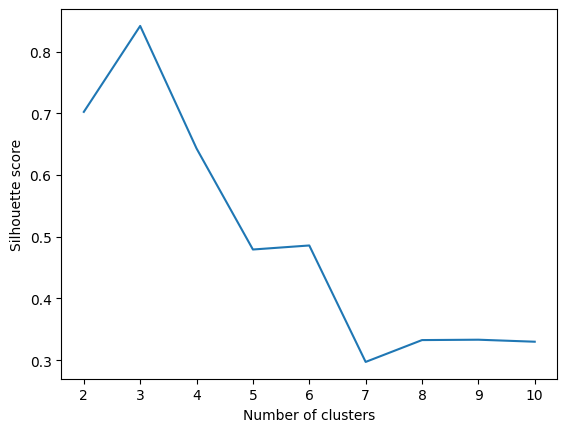

In [30]:
# Plotting silhouette_score
plt.plot(range(2,11),silhouette_coff)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()